<a href="https://colab.research.google.com/github/rutujabhosale24/ANN_Wine_Data/blob/main/ANN_Wine_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: Design an artificial neural networt which will consider
diffrent features of wine samples and classify it as red or white

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

from sklearn import metrics

In [ ]:
# https://tinyurl.com/4yddujmt

In [ ]:
# dataset link

White: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Red:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


In [ ]:
# Read the white wine dataset
white=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")

# Read the red wine dataset
red=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

In [ ]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [ ]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
pd.isnull(white).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

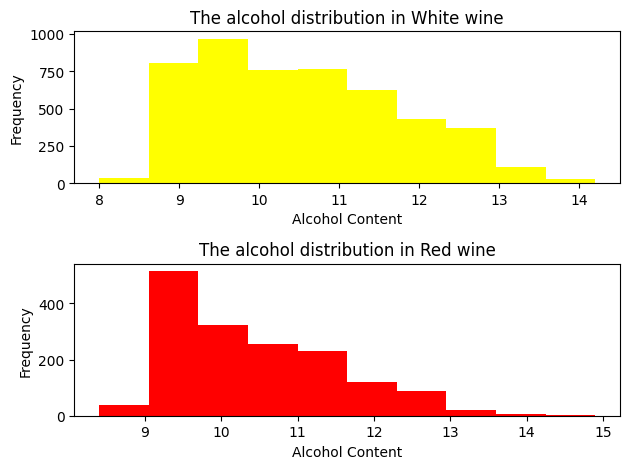

In [ ]:
plt.subplot(2,1,1)
plt.hist(white["alcohol"],color="yellow")
plt.title("The alcohol distribution in White wine")
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")

plt.subplot(2,1,2)
plt.hist(red["alcohol"],color="red")
plt.title("The alcohol distribution in Red wine")
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")

plt.tight_layout()

In [ ]:
# plot the Quality column from red and white datasets

Using Seaborn

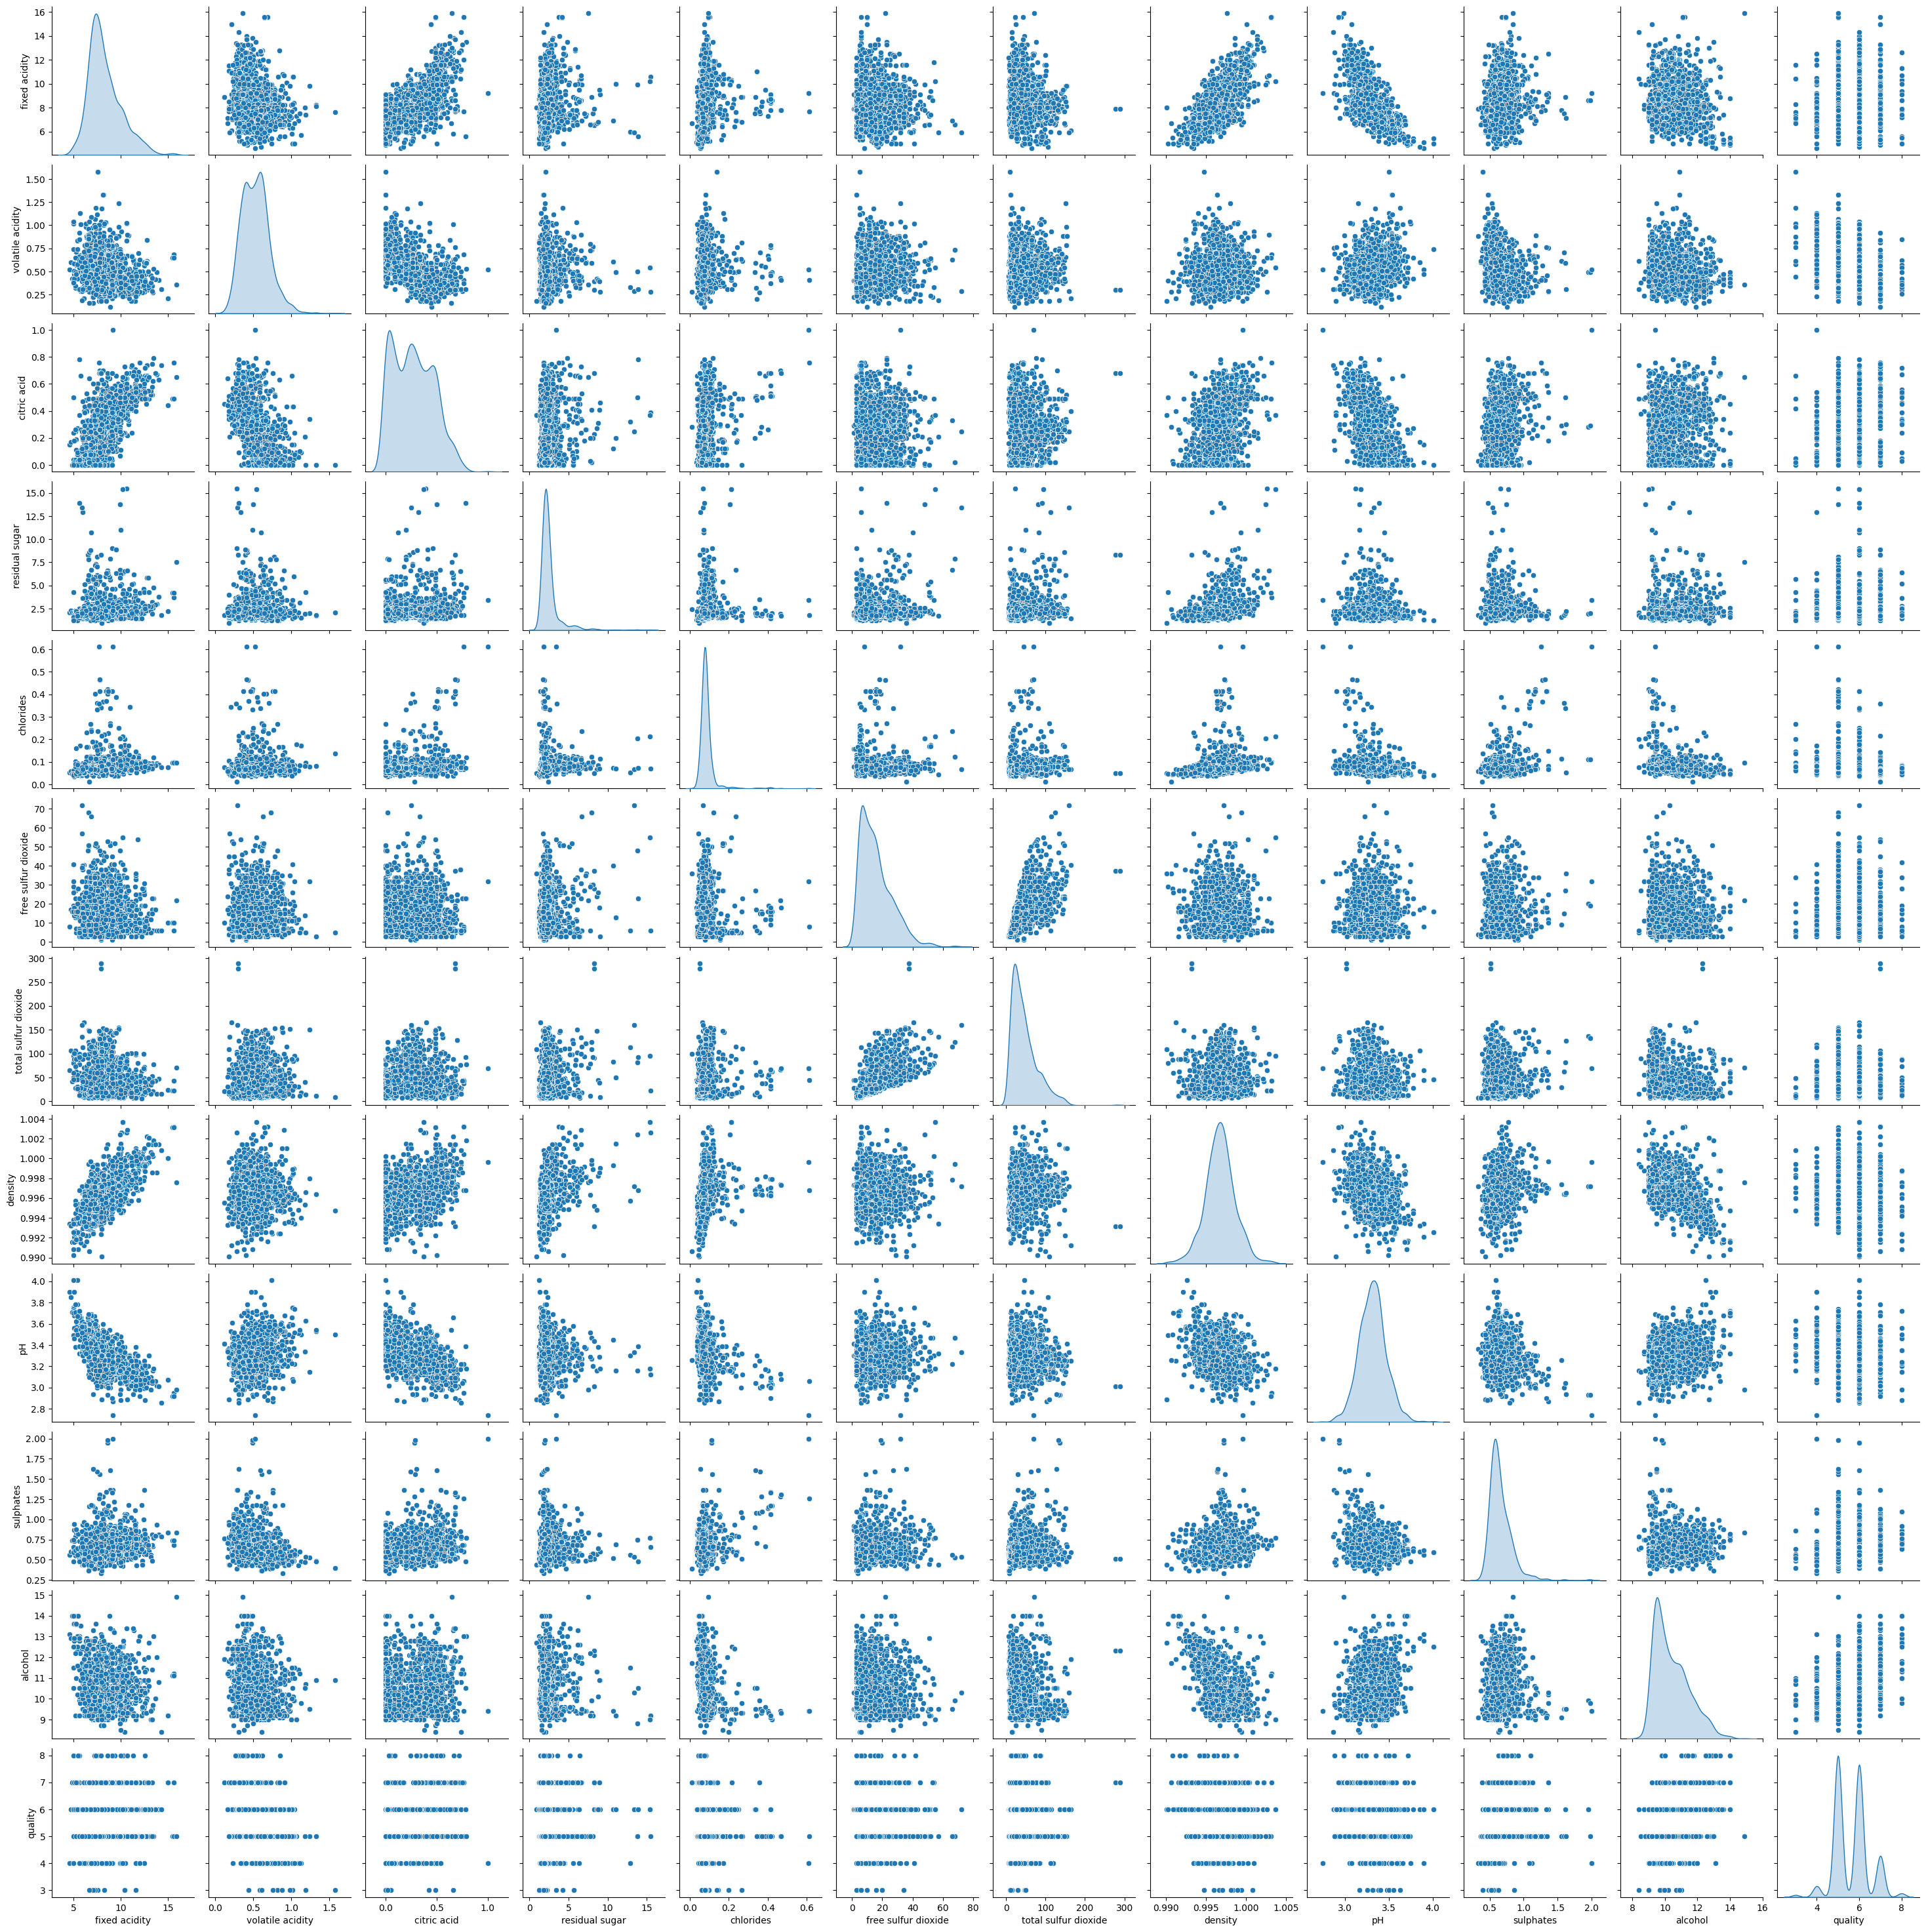

In [ ]:
sns.pairplot(red,diag_kind='kde')

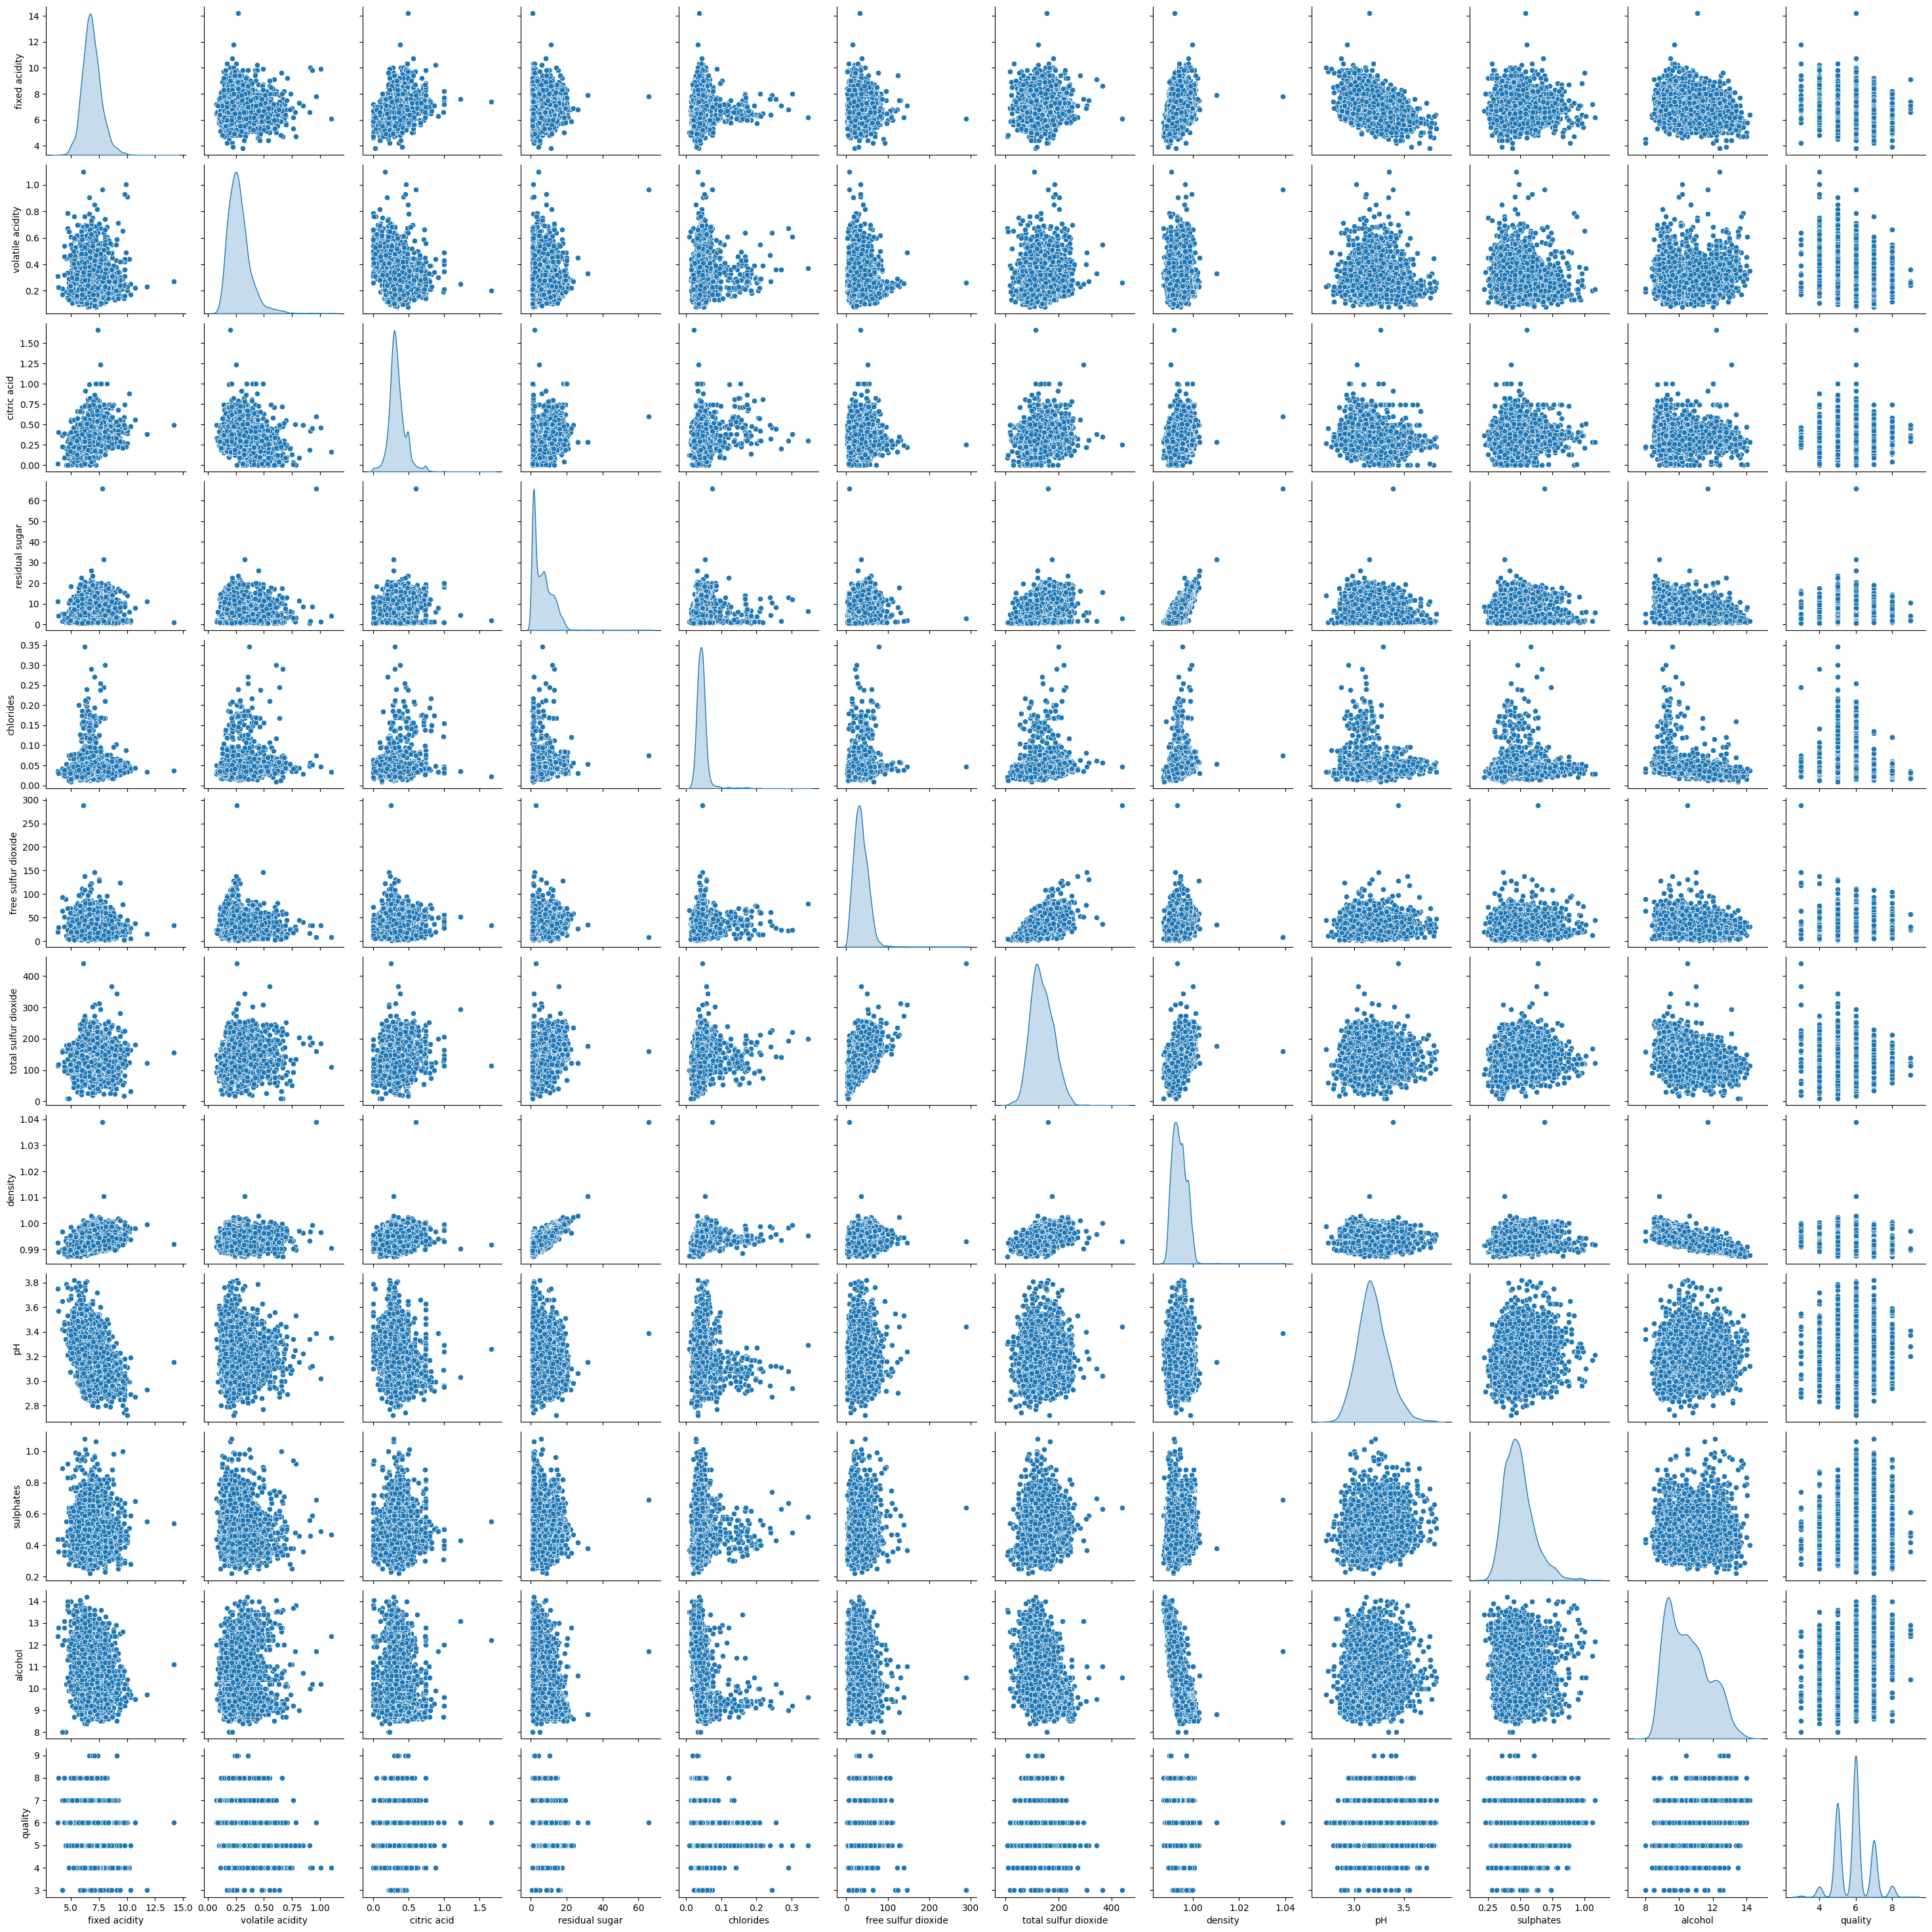

In [ ]:
sns.pairplot(white,diag_kind='kde')

In [ ]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Adding the target column in the white and red wine dataset

In [ ]:
white["type"]=1
red["type"]=0

In [ ]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  type  
0      8.8        6     1  
1      9.5        6     1  
2     10.1        6     1  
3      9.9        6     1  
4      9.9        6     1

In [ ]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0  
3      9.8        6     0  
4      9.4        5     0

Merging two datasets into one dataset

In [ ]:
wines=pd.concat([white,red],ignore_index=True)
wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  type  
0         8.8        6     1  
1         9.5        6     1  
2        10.1        6     1  
3         9.9        6     1  
4         9.9        6     1  
...       ...      ...   ...  
6492     10.5        5     0  
6493     11.2        6     0  
6494     11.0        6     0  
6495     10.2        5     0  
6496     11.0        6     0  

[6497 rows x 13 columns]

Seperating X and Y column

In [ ]:
X=wines.drop("type",axis=1)
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
6492     10.5        5  
6493     11.2        6  
6494     11.0        6  
6495     10.2        5  
6496     11.0        6  

[6497 rows x 12 columns]

In [ ]:
Y=wines["type"]
Y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

Splitting Data into Training and Testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(4547, 12)

In [ ]:
y_train.shape

(4547,)

In [ ]:
x_test.shape

(1950, 12)

In [ ]:
y_test.shape

(1950,)

Normalizing the data

In [ ]:
x_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3761            6.1              0.17         0.28             2.5      0.028   
3740            7.0              0.15         0.28            14.7      0.051   
1359            6.5              0.19         0.32             1.4      0.040   
1230            7.3              0.29         0.30            13.0      0.043   
4751            7.3              0.36         0.62             7.1      0.033   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3761                 22.0                  98.0  0.99072  3.16       0.37   
3740                 29.0                 149.0  0.99792  2.96       0.39   
1359                 31.0                 132.0  0.99220  3.36       0.54   
1230                 46.0                 238.0  0.99860  3.06       0.41   
4751                 48.0                 185.0  0.99472  3.14       0.62   

      alcohol  quality  
3761     11.1        7  
3740      9.0        7  
1359     10.8        7  
1230      8.7        6  
4751     10.6        6

In [ ]:
ss=StandardScaler()

# Scale the train set
X_train=ss.fit_transform(x_train)

# Scale the test set
X_test=ss.fit_transform(x_test)

In [ ]:
X_train[0]

array([-0.86011358, -1.02517226, -0.27112876, -0.61942715, -0.81007997,
       -0.4825979 , -0.30835538, -1.33985113, -0.36742171, -1.07805388,
        0.50098461,  1.34189379])

**Building an ANN**

In [ ]:
ANN=Sequential()

# neurons between input number (here input is 12) or output number (here output  is 2)

# 1st Layer
ANN.add(Dense(12,activation="relu",input_shape=(12,)))     # we have to reshape our shape to 2D into 1D

# 2nd layer
ANN.add(Dense(8,activation="relu"))

# Output Layer
ANN.add(Dense(1,activation="sigmoid"))     # Here Output is 2 (red or white/ 0 or 1) thats why sigmoid

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ANN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269 (1.05 KB)

 Trainable params: 269 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ANN.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=ANN.fit(X_train,y_train,batch_size=1,epochs=20,verbose=2)

Epoch 1/20
4547/4547 - 9s - 2ms/step - accuracy: 0.9738 - loss: 0.0816
Epoch 2/20
4547/4547 - 10s - 2ms/step - accuracy: 0.9958 - loss: 0.0246
Epoch 3/20
4547/4547 - 10s - 2ms/step - accuracy: 0.9954 - loss: 0.0209
Epoch 4/20
4547/4547 - 12s - 3ms/step - accuracy: 0.9963 - loss: 0.0191
Epoch 5/20
4547/4547 - 18s - 4ms/step - accuracy: 0.9967 - loss: 0.0165
Epoch 6/20
4547/4547 - 7s - 2ms/step - accuracy: 0.9969 - loss: 0.0158
Epoch 7/20
4547/4547 - 14s - 3ms/step - accuracy: 0.9969 - loss: 0.0147
Epoch 8/20
4547/4547 - 18s - 4ms/step - accuracy: 0.9974 - loss: 0.0132
Epoch 9/20
4547/4547 - 11s - 2ms/step - accuracy: 0.9974 - loss: 0.0130
Epoch 10/20
4547/4547 - 9s - 2ms/step - accuracy: 0.9974 - loss: 0.0113
Epoch 11/20
4547/4547 - 11s - 2ms/step - accuracy: 0.9971 - loss: 0.0126
Epoch 12/20
4547/4547 - 10s - 2ms/step - accuracy: 0.9980 - loss: 0.0106
Epoch 13/20
4547/4547 - 12s - 3ms/step - accuracy: 0.9980 - loss: 0.0103
Epoch 14/20
4547/4547 - 19s - 4ms/step - accuracy: 0.9980 - los

In [ ]:
loss,acc=ANN.evaluate(X_test,y_test,verbose=0)
print("Test Accuracy is ",acc)
print("Test loss is ",loss)

Test Accuracy is  0.9948717951774597
Test loss is  0.08831787109375


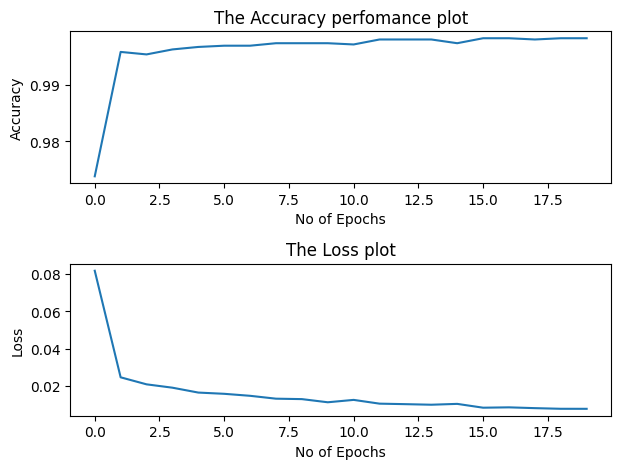

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history["accuracy"])
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("The Accuracy perfomance plot")

plt.subplot(2,1,2)
plt.plot(history.history["loss"])
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.title("The Loss plot")

plt.tight_layout()

In [ ]:
y_test_pred_raw=ANN.predict(X_test)
y_test_pred_raw[0:5]

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.9992845],
       [0.9999251],
       [1.       ],
       [1.       ],
       [1.       ]], dtype=float32)

In [ ]:
y_test_pred=np.round(y_test_pred_raw)
y_test_pred[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

**Plotting Confusion matrix**

In [ ]:
metrics.confusion_matrix(y_test,y_test_pred,labels=[0,1])

array([[ 469,    8],
       [   2, 1471]])

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_test_pred,labels=[0,1]),index=["Acutal:Red","Acutal:White"])

0     1
Acutal:Red    469     8
Acutal:White    2  1471